# Анализ  Google Play market

### Оглавление

1. [Загрузка данных](#loading)
2. [Подготовка данных](#prep)
  1. [Выбросы](#nan)
  2. [Очистка данных](#clearing)
3. [EDA](#eda)
4. 

### Загрузка данных
<a id=loading></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Подготовка данных
<a id=prep></a>

In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
#заменим пробелы в названиях колонок на _ для удобства
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Выбросы
<a id=nan></a>

In [6]:
df.describe() 
#Проверим столбец Rating на наличие выбросов

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:title={'center':'Распределение оценок'}>

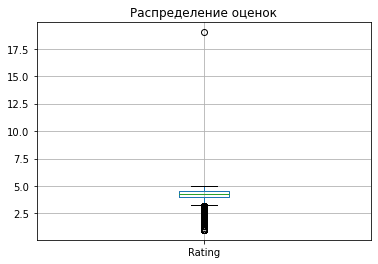

In [7]:
#Построим boxplot для удобства
df['Rating'].plot(kind='box',
                   title='Распределение оценок', grid=True)

In [8]:
#На boxplot видно 1 значение,которое очень сильно отличается от остальных. Найдем эту строку в df
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
"""
Данные в этой строке отличаются от всего df. Можно заметить,что записи введены некорректно и сдвинуты на 1 ячейку 
назад. Пока удалим строку.
"""

df.drop([10472], inplace=True)

<AxesSubplot:title={'center':'Распределение оценок'}>

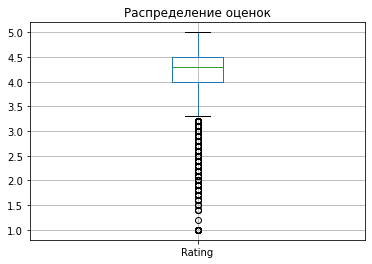

In [10]:
#после удаления некорректной строки
df['Rating'].plot(kind='box',
                   title='Распределение оценок', grid=True)

### Очистка данных 
<a id=clearing></a>

In [11]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [12]:
#Изменим значения столбца Reviews на числовые
df['Reviews'] = df['Reviews'].astype('int')

In [13]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [14]:
#Изменим значения столбца Size на числовые, заменим 'Varies with device' на NaN, переведем все значения в Мб
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: (str(x).replace('M','')) if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: (str(x).replace(',','')) if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].astype(float)


In [15]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
#очистим столбец Installs от + и , переведем значения в числовой формат
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype(int)

In [17]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [18]:
#очистим столбец Price от знака $ и переведм в числовой формат
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10832 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [20]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9366.000000,1.084000e+04,9145.000000,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,21.516530,1.546434e+07,1.027368
std,0.515219,2.927761e+06,22.588748,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [21]:
#Переведем столбец Last_Updated в формат datetime
from datetime import datetime
df['Last_Updated']= pd.to_datetime(df.Last_Updated)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### EDA
<a id=eda></a>

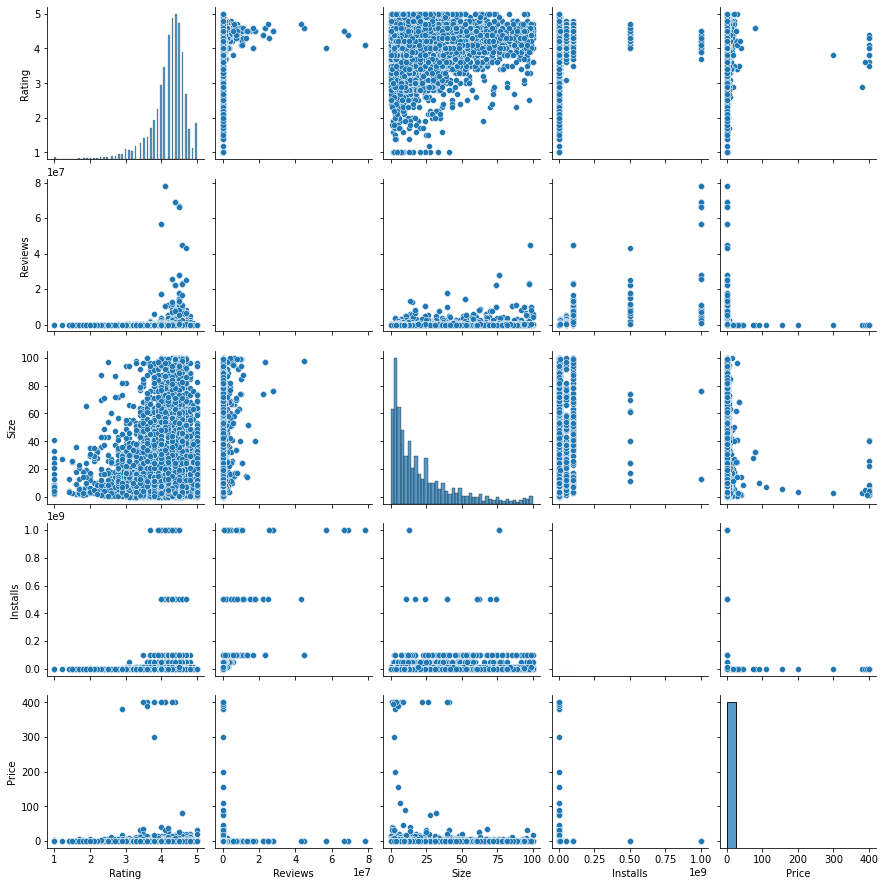

In [100]:
sns.pairplot(df)

In [89]:
most_pop_category = df[['Category','Installs']].groupby('Category').sum().sort_values(by='Installs', ascending=False)
most_pop_category

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10
FAMILY,1.025826e+10
PHOTOGRAPHY,1.008825e+10
NEWS_AND_MAGAZINES,7.496318e+09
TRAVEL_AND_LOCAL,6.868887e+09


#### Самая популярная категория по количеству загрузок - Игры

<AxesSubplot:title={'center':'Топ-10 категорий по количеству загрузок'}, xlabel='Категория', ylabel='Количество загрузок'>

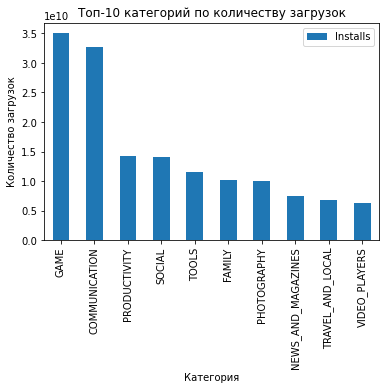

In [99]:
most_pop_category.head(10).plot(kind='bar',                                                                 
                       title='Топ-10 категорий по количеству загрузок',
                       xlabel='Категория',
                       ylabel='Количество загрузок')


In [118]:
type_ = df['Type'].value_counts()
type_

Free    10039
Paid      800
Name: Type, dtype: int64

#### Количество платных и бесплатных приложений

<AxesSubplot:ylabel='Type'>

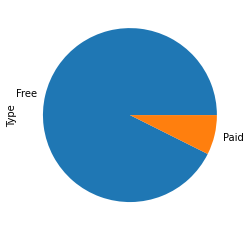

In [120]:
type_.plot(kind='pie')

#### Топ-20 самых дорогих приложений

In [130]:
top_price = df[['App','Price']].sort_values(by='Price', ascending=False).head(20)
top_price
"""Здесь встречаются дубликаты названий,что с ними делать?"""

,App,Price
4367,I'm Rich - Trump Edition,400.00
5351,I am rich,399.99
5358,I am Rich!,399.99
4197,most expensive app (H),399.99
5369,I am Rich,399.99
5359,I am rich(premium),399.99
5373,I AM RICH PRO PLUS,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99
5356,I Am Rich Premium,399.99
4362,💎 I'm rich,399.99


In [140]:
# Поиск дубликатов в названиях приложений
df1 = df.App.value_counts()
df1[df1>1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
Microsoft OneDrive                                   2
Princess Coloring Book                               2
Kids Balloon Pop Game Free 🎈                         2
Shadow Fight 2                                       2
Health and Nutrition Guide                           2
Name: App, Length: 798, dtype: int64

#### Достпуность приложений по возрастным группам

In [153]:
content = df[['Category','Content_Rating']].groupby('Content_Rating').count().sort_values(by='Category')
content

,Category
Content_Rating,
Unrated,2
Adults only 18+,3
Everyone 10+,414
Mature 17+,499
Teen,1208
Everyone,8714


<AxesSubplot:xlabel='Content_Rating'>

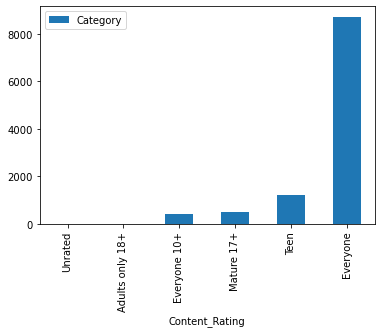

In [154]:
content.plot(kind='bar')

#### Количество отзывов для каждой категории приложений

In [168]:
rew = df[['Category','Reviews']].groupby('Category').sum().sort_values(by='Reviews', ascending=False)
rew.head(10)

,Reviews
Category,
GAME,1585422349
COMMUNICATION,815462260
SOCIAL,621241422
FAMILY,410226330
TOOLS,273185044
PHOTOGRAPHY,213516650
SHOPPING,115041222
PRODUCTIVITY,114116975
VIDEO_PLAYERS,110380188


<AxesSubplot:xlabel='Category'>

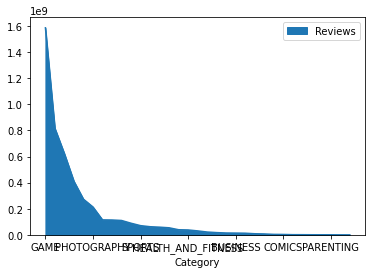

In [175]:
rew.plot(kind='area')


In [206]:
#отфильтруем датафрейм по нужным колонкам
df_filtr=df[['Category','Rating','Type']]
df_filtr

,Category,Rating,Type
0,ART_AND_DESIGN,4.1,Free
1,ART_AND_DESIGN,3.9,Free
2,ART_AND_DESIGN,4.7,Free
3,ART_AND_DESIGN,4.5,Free
4,ART_AND_DESIGN,4.3,Free
...,...,...,...
10836,FAMILY,4.5,Free
10837,FAMILY,5.0,Free
10838,MEDICAL,NaN,Free
10839,BOOKS_AND_REFERENCE,4.5,Free


#### Средний рейтинг по категориям для бесплатных приложений

In [204]:
free=df_filtr.loc[df1['Type']=='Free'].groupby('Category').mean()
free

,Rating
Category,
ART_AND_DESIGN,4.338983
AUTO_AND_VEHICLES,4.184722
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.349412
BUSINESS,4.118493
COMICS,4.155172
COMMUNICATION,4.165359
DATING,3.978010
EDUCATION,4.379470


#### Средний рейтинг по категориям для платных приложений

In [201]:
paid=df_filtr.loc[df1['Type']=='Paid'].groupby('Category').mean()
paid

,Rating
Category,
ART_AND_DESIGN,4.733333
AUTO_AND_VEHICLES,4.600000
BOOKS_AND_REFERENCE,4.275000
BUSINESS,4.200000
COMMUNICATION,4.063636
DATING,3.625000
EDUCATION,4.750000
ENTERTAINMENT,4.600000
EVENTS,NaN


<AxesSubplot:title={'center':'Распределение среднего рейтинга платных приложений'}, ylabel='Frequency'>

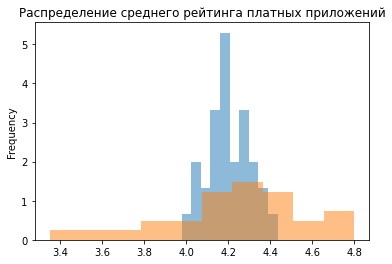

In [205]:
# сравнение рейтинга платных и бесплатных приложений
free['Rating'].plot(kind='hist', 
                     title='Распределение среднего рейтинга бесплатных приложений',
                     alpha = 0.5,
                     density = True)


paid['Rating'].plot(kind='hist', 
                     title='Распределение среднего рейтинга платных приложений',
                     alpha = 0.5,
                     density = True)


#### Вывод: бесплатным приложеням пользователи  в среднем ставят рейтинг 4.0-4.4, а платные приложения пользователи оценивают более критично и рейтинг варьируется в пределах 3.8-4.8